In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from IPython import display
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.dummy import DummyRegressor
from catboost import Pool, CatBoostRegressor, cv
from sklearn.linear_model import BayesianRidge, LinearRegression, Lasso, LassoCV, Lars, LassoLars
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier, ExtraTreesRegressor, VotingRegressor, VotingClassifier)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from hyperopt import fmin, tpe, hp, Trials
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier

In [2]:
#reading in data and glancing at it to make sure it looks right
df = pd.read_csv('disaster_df_preprocessed.csv')
df.head()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentLength,Month,Year,Season,disaster_count,incidentType_ce_CBE,state_ce_CBE,DR,EM,FM
0,0,1,1,1,0,5,1953,2,9.0,722.010872,722.010872,1,0,0
1,0,1,1,1,0,5,1953,2,9.0,365.505436,722.010872,1,0,0
2,0,1,1,1,0,5,1953,2,9.0,722.010872,722.010872,1,0,0
3,0,1,1,1,0,6,1953,2,9.0,246.670291,722.010872,1,0,0
4,0,1,1,1,0,6,1953,2,9.0,365.505436,722.010872,1,0,0


In [3]:
#before training any models on the data, we are seperating training and testing data
#creating features
X = df.drop(['disaster_count'], axis=1)
y = df['disaster_count']

In [4]:
#making test and training split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .25, random_state = 123)

Linear Regression

In [5]:
#building and fitting linear regression model
lin_reg = LinearRegression(fit_intercept = True)
lin_reg.fit(X_train, y_train)

LinearRegression()

In [6]:
#testing linear regression model for r-squared score on training data
score = lin_reg.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.36


In [7]:
#testing linear regression model for mean squared error
ypred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 623279.74


In [8]:
#testing linear regression model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 0.36


In [9]:
#testing linear regression model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 789.48


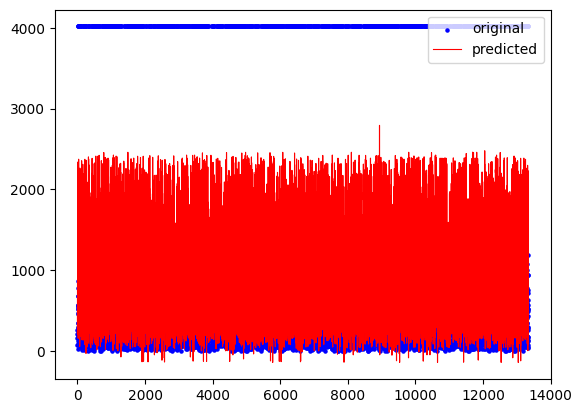

In [10]:
#plotting linear regression model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [11]:
#using grid search to tune hyperparameters
def grid_search(model, grid):
    model_cv = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
    model_cv.fit(X_train, y_train)
    return (model_cv.best_params_)

In [12]:
#determining best parameters for linear regression model
param_grid_lr = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

print(grid_search(model = LinearRegression(), grid = param_grid_lr))

{'copy_X': True, 'fit_intercept': True, 'normalize': True}


In [13]:
lin_reg_tuned = LinearRegression(fit_intercept = True, copy_X = True, normalize = True)
lin_reg_tuned.fit(X_train, y_train)

LinearRegression(normalize=True)

In [14]:
#testing tuned linear regression model for r-squared score on training data
score = lin_reg_tuned.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.36


In [15]:
#testing tuned linear regression model for mean squared error
ypred = lin_reg_tuned.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 623234.55


In [16]:
#testing tuned linear regression model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 0.36


In [17]:
#testing tuned linear regression model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 789.45


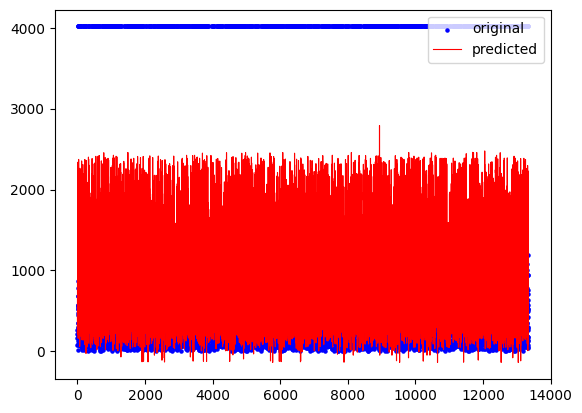

In [18]:
#plotting tuned linear regression model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

Bad model, throwing out.

Random Forest Regressor

In [19]:
rfr = RandomForestRegressor(n_estimators = 1000)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [20]:
#testing random forest regression model for r-squared score on training data
score = rfr.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 1.00


In [21]:
#getting cross validation score for random forest regressions
cv_score = cross_val_score(rfr,X_test, np.ravel(y_test), cv = 5)
np.mean(cv_score)

0.9943518228983429

In [22]:
#testing random forest regression model for mean squared error
ypred = rfr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 387.39


In [23]:
#testing random forest regression model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 1.00


In [24]:
#testing random forest regression model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 19.68


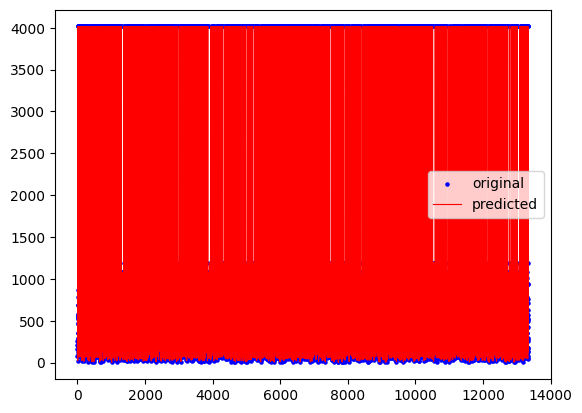

In [25]:
#plotting random forest regression model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [26]:
#using grid search to tune hyperparameters
def grid_search(model, grid):
    model_cv = GridSearchCV(estimator = model, param_grid = grid, cv = 5)
    model_cv.fit(X_train, y_train)
    return (model_cv.best_params_)

In [27]:
#determining best parameters for random forest regression model
param_grid_rfr = {'max_depth':[3, 5, None], 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], 'bootstrap':[True, False]}

print(grid_search(model = RandomForestRegressor(), grid = param_grid_rfr))

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

{'bootstrap': True, 'criterion': 'friedman_mse', 'max_depth': None}


In [28]:
rfr = RandomForestRegressor(n_estimators = 1000, bootstrap = True, criterion = 'friedman_mse', max_depth = None)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

In [29]:
#testing tuned random forest regression model for r-squared score on training data
score = rfr.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 1.00


In [30]:
#getting cross validation score for tuned random forest regressions
cv_score = cross_val_score(rfr,X_test, np.ravel(y_test), cv = 5)
np.mean(cv_score)

0.9943741623378328

In [31]:
#testing tuned random forest regression model for mean squared error
ypred = rfr.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 375.51


In [32]:
#testing tuned random forest regression model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 1.00


In [33]:
#testing tuned random forest regression model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 19.38


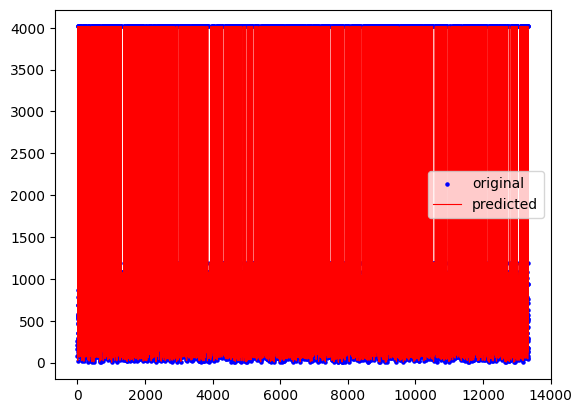

In [34]:
#plotting random forest regression model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

Random Forest Classifier

In [35]:
#random forest classifier model with 1000 estimators
rfc = RandomForestClassifier(n_estimators =1000)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [36]:
#testing random forest classifier model for r-squared score on training data
score = rfc.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 1.00


In [37]:
#getting cross validation score for random forest classifier
cv_score = cross_val_score(rfc,X_test, np.ravel(y_test), cv = 5)
np.mean(cv_score)

The least populated class in y has only 1 members, which is less than n_splits=5.


0.9795320843515251

In [38]:
#testing random forest classifier model for mean squared error
ypred = rfc.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 327.08


In [39]:
#testing random forest classifier model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 1.00


In [40]:
#testing random forest classifier model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 18.09


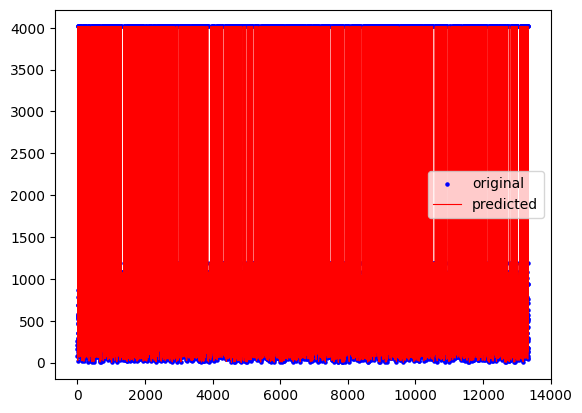

In [41]:
#plotting random forest classifier model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [42]:
#determining best parameters for random forest classifier model
param_grid_rfc = {'max_depth':[3, 5, None], 'criterion':['gini', 'entropy', 'log_loss'], 'bootstrap':[True, False]}

print(grid_search(model = RandomForestClassifier(), grid = param_grid_rfc))

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\colem\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 901, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\colem\anaconda3\envs\Springboard2\lib\site-packages\joblib\parallel.py", line 819, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Use

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}


In [43]:
#boosted random forest classifier model with 1000 estimators
rfc = RandomForestClassifier(n_estimators =1000, bootstrap = False, criterion = 'entropy', max_depth = None)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [44]:
#testing boosted random forest classifier model for r-squared score on training data
score = rfc.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 1.00


In [45]:
#getting boosted cross validation score for random forest classifier
cv_score = cross_val_score(rfc,X_test, np.ravel(y_test), cv = 5)
np.mean(cv_score)

The least populated class in y has only 1 members, which is less than n_splits=5.


0.9832057537035757

In [46]:
#testing boosted random forest classifier model for mean squared error
ypred = rfc.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 328.13


In [47]:
#testing boosted random forest classifier model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: 1.00


In [48]:
#testing boosted random forest classifier model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 18.11


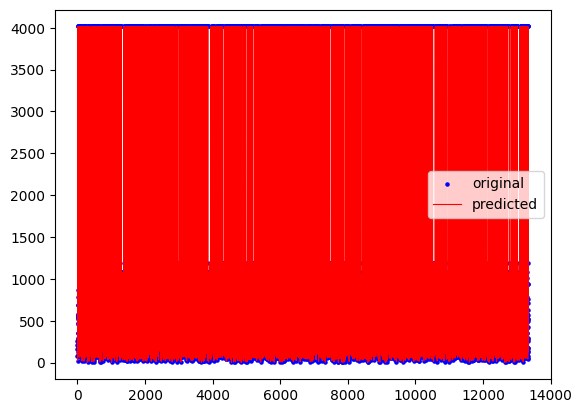

In [49]:
#plotting boosted random forest classifier model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

XG Boost

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [51]:
#fitting XG Boost model to training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [52]:
#testing XG Boost model for r-squared score on training data
score = xgb.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.39


In [53]:
#testing XG Boost model for mean squared error
ypred = xgb.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 1310832.18


In [54]:
#testing XG Boost model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: -0.34


In [55]:
#testing XG Boost model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 1144.92


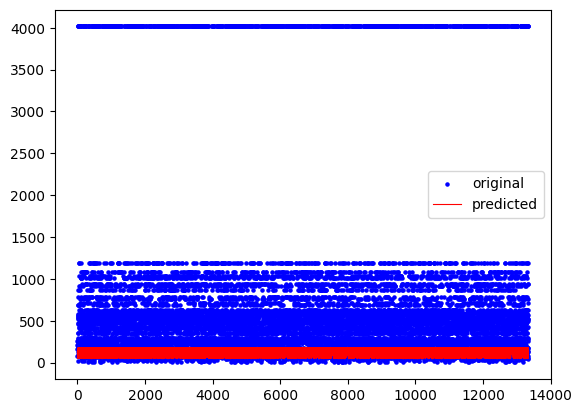

In [56]:
#plotting XG Boost model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show() 

In [57]:
#determining best parameters for XG Boost model
#param_grid_xgb = {'booster':['gbtree','gblinear','dart'], 'disable_default_eval_metric':[True,False], 'validate_parameters':[True,False]}
#'booster':['gbtree','gblinear','dart'] 'disable_default_eval_metric':[True,False], 'validate_parameters':[True,False]
#print(grid_search(model = XGBClassifier(), grid = param_grid_xgb))

In [58]:
#fitting tuned XG Boost model to training data
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [59]:
#testing tuned XG Boost model for r-squared score on training data
score = xgb.score(X_train,y_train)
print("Model score (R-squared): %.2f" % score)

Model score (R-squared): 0.39


In [60]:
#testing tuned XG Boost model for mean squared error
ypred = xgb.predict(X_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: %.2f" % mse)

MSE: 1310832.18


In [61]:
#testing tuned XG Boost model for the coefficient of determination
cod = r2_score(y_test, ypred)
print("Coefficient of determination: %.2f" % cod)

Coefficient of determination: -0.34


In [62]:
#testing tuned XG Boost model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))

RMSE: 1144.92


RMSE: 1144.92


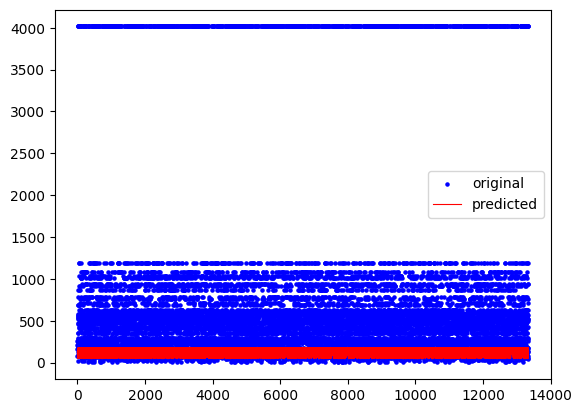

In [63]:
#plotting tuned XG Boost model
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()#testing tuned XG Boost model for root-mean-square deviation
print("RMSE: %.2f" % np.sqrt(mse))
plt.show() 

Analysis

The Random Forest Regressor was far and away the best model and made very accurate predictions. After it was tuned it had a r score of 1.0, cross validation score of 0.9796070749776968, a mean squared error of 262.24, a coefficiant of determination of 1.0, and a root mean squared error of 16.19. While I still build linear regression, random forest classifier and XGboost models to see if they had greater success it was clear the random forest regressor was a solid model. For this reason I did not build a weighted voting classifier to combine multiple models. 